<a href="https://colab.research.google.com/github/Kuriajm/Core_Week6_IP/blob/main/Mchezo_pesa_Ltd_footballl_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mchezo pesa Ltd footballl predictor

**1.0 Understanding the question**

**Defining the question**

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**Metric of success**

The model is able to predict any given game depending on its input with over 80% accuracy

**The context**

The model will help mchezo pesa give appropriate odds for its betting clients



**Experimental design**

1. Define the question, the metric for success, the context, experimental  design taken and the appropriateness of the available data to answer the given question
3. Expected flow for the assessment:
4. Perform your EDA
5. Perform any necessary feature engineering 
6. Check of multicollinearity
7. Start building the model
8. Cross-validate the model
9. Compute RMSE
10. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
11. Perform appropriate regressions on the data including your justification
12. Challenge your solution by providing insights on how you can make improvements.

**2.0 Reading and checking the data**

In [1]:
#Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Fifa Ranking Data

In [2]:
#Loading our ranking dataset and viewing 

dfrank = pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'])


In [3]:
# Determining the no. of records in our dataset
#
dfrank.shape

(57793, 16)

In [4]:
# Previewing the top of our dataset
#
dfrank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the bottom of our dataset
# 
dfrank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# Checking whether each column has an appropriate datatype
#
dfrank.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

Results Data

In [7]:
#Loading the results data

dfresults = pd.read_csv('results.csv', parse_dates=['date'])
dfresults.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Determining the no. of records in our dataset
#
dfresults.shape

(40839, 9)

In [9]:
# Previewing the top of our dataset
#
dfresults.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
# Previewing the bottom of our dataset
# 
dfresults.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
# Checking whether each column has an appropriate datatype
#
dfresults.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

**3.0 Tyding the Dataset**



1.   Clear unwanted columns
2.   Merge the dataset
3.   Clean the data



In [12]:
#chosing the relevant columns to work with strating with the ranking dataset we only need rank and country full

dfrank1 = dfrank[["rank","country_full"]]
dfrank1.head()



,rank,country_full
0,1,Germany
1,2,Italy
2,3,Switzerland
3,4,Sweden
4,5,Argentina


In [13]:
dfrank2 = dfrank1

In [14]:
#renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank

dfrank3= dfrank1.rename({'country_full': 'home_team'}, axis = 1)
dfrank3.columns

Index(['rank', 'home_team'], dtype='object')

In [15]:
#creating a copy of the ranking_2 dataframe

dfrank4 =  dfrank2

#renaming the country_full column to home_team to merge with the results dataset and obtain the away team rank
# previewed the head of ranking_4 dataset

dfrank4 = dfrank4.rename({'country_full': 'away_team'}, axis = 1)
print(dfrank4.columns)

Index(['rank', 'away_team'], dtype='object')


In [16]:
#Back to results dataset

#choosing the relevant columns in the results dataset

dfresults1 = dfresults[["home_team","away_team","home_score","away_score","tournament","neutral"]]
dfresults1.head()


,home_team,away_team,home_score,away_score,tournament,neutral
0,Scotland,England,0,0,Friendly,False
1,England,Scotland,4,2,Friendly,False
2,Scotland,England,2,1,Friendly,False
3,England,Scotland,2,2,Friendly,False
4,Scotland,England,3,0,Friendly,False


In [17]:
# Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
dfresults2=dfresults1
home_df = pd.merge(dfresults1, dfrank3, how='left', on = ['home_team'])
#Renaming rank to home team rank
home_df = home_df.rename({'rank': 'home_team_rank'}, axis = 1)
home_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank
0,Scotland,England,0,0,Friendly,False,30.0
1,Scotland,England,0,0,Friendly,False,28.0
2,Scotland,England,0,0,Friendly,False,29.0
3,Scotland,England,0,0,Friendly,False,25.0
4,Scotland,England,0,0,Friendly,False,24.0


In [18]:
# Merging the two datasets to obtain the away_team rank dataset

away_df = pd.merge(dfresults1, dfrank4, how='left', on = ['away_team'])

#renaming the rank column to obtaing the away_team_rank

away_df = away_df.rename({'rank': 'away_team_rank'}, axis = 1)
away_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,away_team_rank
0,Scotland,England,0,0,Friendly,False,11.0
1,Scotland,England,0,0,Friendly,False,5.0
2,Scotland,England,0,0,Friendly,False,10.0
3,Scotland,England,0,0,Friendly,False,8.0
4,Scotland,England,0,0,Friendly,False,11.0


In [19]:
#obtaining the final dataset for modelling
#result = pd.concat([df1, df4], axis=1, join="inner")

final_df = pd.concat([home_df, away_df], axis=1, join = 'inner')

final_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,home_team,away_team,home_score,away_score,tournament,neutral,away_team_rank
0,Scotland,England,0,0,Friendly,False,30.0,Scotland,England,0,0,Friendly,False,11.0
1,Scotland,England,0,0,Friendly,False,28.0,Scotland,England,0,0,Friendly,False,5.0
2,Scotland,England,0,0,Friendly,False,29.0,Scotland,England,0,0,Friendly,False,10.0
3,Scotland,England,0,0,Friendly,False,25.0,Scotland,England,0,0,Friendly,False,8.0
4,Scotland,England,0,0,Friendly,False,24.0,Scotland,England,0,0,Friendly,False,11.0


In [20]:
#Here lets remove duplicated columns

finaldf = final_df

finaldf = finaldf.loc[:,~finaldf.columns.duplicated()]
finaldf.head()


,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank
0,Scotland,England,0,0,Friendly,False,30.0,11.0
1,Scotland,England,0,0,Friendly,False,28.0,5.0
2,Scotland,England,0,0,Friendly,False,29.0,10.0
3,Scotland,England,0,0,Friendly,False,25.0,8.0
4,Scotland,England,0,0,Friendly,False,24.0,11.0


Clean the data

In [21]:
# Identifying the Missing Data

finaldf.isnull().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
neutral              0
home_team_rank    4233
away_team_rank    4461
dtype: int64

In [22]:
# Dealing with the Missing Data

finaldf1 = finaldf.dropna()
finaldf1.isnull().sum()


home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
neutral           0
home_team_rank    0
away_team_rank    0
dtype: int64

In [23]:
polydf = finaldf1

**4.0 Feature Engineering**

In [24]:
#have tournament type as only World Cup, Friendly and Other

polydf.tournament = polydf.tournament.apply(lambda x: x.strip())
polydf.tournament = polydf.tournament.apply(lambda x: 'World Cup' if x == 'FIFA World Cup qualification' else ( 'World Cup' if x == 'FIFA World Cup' else ('Friendly' if x == 'Friendly' else 'Other')))

polydf.tournament.unique()

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [25]:
#For our Polynomial approach lets remain what to train given that is
#Rank of home team
#Rank of away team
#Tournament type
#home scores as our predictor

#choosing the relevant columns in the results dataset
homescore = polydf
homescore = homescore[["home_team_rank","away_team_rank","tournament", "home_score"]]
homescore.head()



,home_team_rank,away_team_rank,tournament,home_score
0,30.0,11.0,Friendly,0
1,28.0,5.0,Friendly,0
2,29.0,10.0,Friendly,0
3,25.0,8.0,Friendly,0
4,24.0,11.0,Friendly,0


In [26]:
#encode tournament
#label encoding
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
homescore['tournament'] = le.fit_transform(homescore['tournament'])

homescore.head()

,home_team_rank,away_team_rank,tournament,home_score
0,30.0,11.0,0,0
1,28.0,5.0,0,0
2,29.0,10.0,0,0
3,25.0,8.0,0,0
4,24.0,11.0,0,0


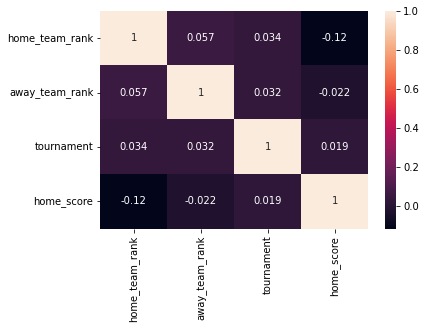

In [27]:
#correlation heatmap
sns.heatmap(homescore.corr(),annot=True)
plt.show()

In [28]:
#multicollinearity test



# Let's display the correlations between the variables
correlations = homescore.corr()

correlations

,home_team_rank,away_team_rank,tournament,home_score
home_team_rank,1.000000,0.056657,0.034159,-0.117358
away_team_rank,0.056657,1.000000,0.032148,-0.022052
tournament,0.034159,0.032148,1.000000,0.018934
home_score,-0.117358,-0.022052,0.018934,1.000000


##**5.0 Implementing the Solution**

**Polynomial Regression**

Training the Polynomial Regression model on the whole dataset

In [29]:
#separating the data to features and label (model 1: Home scores)
#tournament Other = 1, Friendly = 0, WorldCup = 2
X = (homescore[['home_team_rank','away_team_rank','tournament']]).values
y = (homescore[['home_score']]).values

In [30]:
# Splitting the data
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

**Predicting with Polnomial**

In [32]:
#Using X_test to predict
preds = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [33]:
#printing out predicted home scores against test
np.set_printoptions(precision=2)
print(np.concatenate((preds.reshape(len(preds),1), y_test.reshape(len(y_test),1)),1))

[[1.62 2.  ]
 [1.64 0.  ]
 [1.5  1.  ]
 ...
 [1.48 3.  ]
 [1.59 0.  ]
 [1.97 2.  ]]


In [34]:
#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-Squared:', metrics.r2_score(y_test, preds))

Mean Absolute Error: 1.2404180568949534
Mean Squared Error: 2.8951640865346993
Root Mean Squared Error: 1.7015181710856628
R-Squared: 0.018810203934076286


Adjust and try again

In [35]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [36]:
#Using X_test to predict
preds = lin_reg_2.predict(poly_reg.fit_transform(X_test))

#printing out predicted home scores against test
np.set_printoptions(precision=2)
print(np.concatenate((preds.reshape(len(preds),1), y_test.reshape(len(y_test),1)),1))

#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-Squared:', metrics.r2_score(y_test, preds))

[[1.62 2.  ]
 [1.64 0.  ]
 [1.5  1.  ]
 ...
 [1.48 3.  ]
 [1.59 0.  ]
 [1.97 2.  ]]
Mean Absolute Error: 1.2404180568949534
Mean Squared Error: 2.8951640865346993
Root Mean Squared Error: 1.7015181710856628
R-Squared: 0.018810203934076286


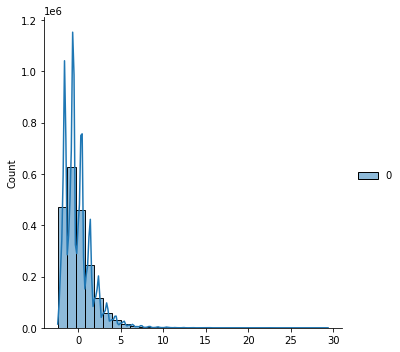

In [37]:
#Residual Plot distribution
sns.displot((y_test-preds), bins = 30, kde = True)
plt.show()

**Logistical Regression**

Feature engeneering

In [38]:
#creating a column(status) that shows whether the match ended in a win, loss or draw

status = finaldf1

status['status'] = status['home_score'] - status['away_score']
def home_team(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
status['status'] = status.status.apply(lambda h: home_team(h))
status.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank,status
0,Scotland,England,0,0,Friendly,False,30.0,11.0,Draw
1,Scotland,England,0,0,Friendly,False,28.0,5.0,Draw
2,Scotland,England,0,0,Friendly,False,29.0,10.0,Draw
3,Scotland,England,0,0,Friendly,False,25.0,8.0,Draw
4,Scotland,England,0,0,Friendly,False,24.0,11.0,Draw


In [39]:
#encode status, neutral, tournament
#label encoding
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
status['status'] = le.fit_transform(status['status'])
status['tournament'] = le.fit_transform(status['tournament'])
status['neutral'] = le.fit_transform(status['neutral'])

status.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank,status
0,Scotland,England,0,0,0,0,30.0,11.0,0
1,Scotland,England,0,0,0,0,28.0,5.0,0
2,Scotland,England,0,0,0,0,29.0,10.0,0
3,Scotland,England,0,0,0,0,25.0,8.0,0
4,Scotland,England,0,0,0,0,24.0,11.0,0


In [40]:
#Drop all the other not needed columns

status.drop(['home_team', 'away_team','home_score','away_score'],axis=1,inplace=True)
status.head()

,tournament,neutral,home_team_rank,away_team_rank,status
0,0,0,30.0,11.0,0
1,0,0,28.0,5.0,0
2,0,0,29.0,10.0,0
3,0,0,25.0,8.0,0
4,0,0,24.0,11.0,0


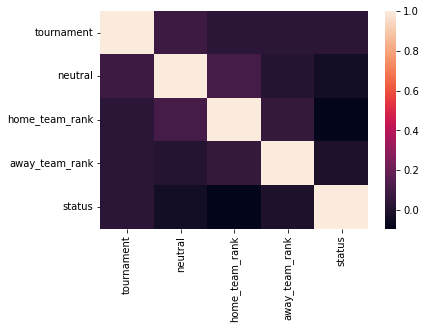

In [42]:
# Checking for independence between features¶
# 
sns.heatmap(status.corr())  

In [43]:
# Splitting our dataset
#
X = status.drop("status",axis=1)
y = status["status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [44]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [46]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix



array([[      0,   88331,  627977],
       [      0,  173537,  691336],
       [      0,  149168, 1328149]])

# The results from the confusion matrix tell us that the first column are the wrongly predicted win, loss and draw, the second are actual and the third are the actual predictions   
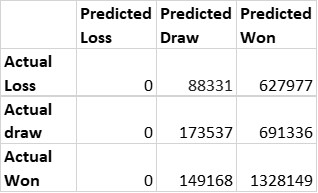